In [13]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
files = [f for f in os.listdir(r'\Users\Florian\OneDrive\Documents\MDS - MBA Data\#MBA2\Pyhton\Projet Data\DATASET')]
for fichier in files:
    print(fichier)

All_Sales_Data.csv
April.csv
August.csv
December.csv
February.csv
January.csv
July.csv
June.csv
March.csv
May.csv
November.csv
October.csv
September.csv


In [17]:
# On introduit une variable de chemin d'accès au fichier
path = r'\Users\Florian\OneDrive\Documents\MDS - MBA Data\#MBA2\Pyhton\Projet Data\DATASET'
# Définir la dataframe
All_Sales_Data = pd.DataFrame()

for fichier in files:
    csv_file = pd.read_csv(path + '/' + fichier)
    All_Sales_Data = pd.concat([All_Sales_Data, csv_file], ignore_index=True)

In [18]:
All_Sales_Data.to_csv(path + '/All_Sales_Data.csv', index=False)

In [19]:
All_Sales_Data =  All_Sales_Data.dropna()

In [20]:
All_Sales_Data.drop_duplicates

<bound method DataFrame.drop_duplicates of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
560545   259353      AAA Batteries (4-pack)                3       2.99   
560546   259354                      iPhone                1        700   
560547   259355                      iPhone                1        700   
560548   259356      34in Ultrawide Monitor                1     379.99   
560549   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase 

In [21]:
def month(x):
    return str(x).split('/')[0]
All_Sales_Data['Month'] = All_Sales_Data['Order Date'].apply(month)
# Remove rows where 'Quantity Ordered' is not numeric
All_Sales_Data = All_Sales_Data[All_Sales_Data['Month'].str.isnumeric()]

# Convert 'Quantity Ordered' to integer
All_Sales_Data['Month'] = All_Sales_Data['Month'].astype(int)
All_Sales_Data['Month'].unique()

C:\Users\Florian\AppData\Local\Temp\ipykernel_1668\3830897677.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_Sales_Data['Month'] = All_Sales_Data['Month'].astype(int)


array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [23]:
All_Sales_Data['Month'] = All_Sales_Data['Month'].astype(int)

In [27]:
# Remove rows where 'Quantity Ordered' is not numeric
All_Sales_Data = All_Sales_Data[All_Sales_Data['Quantity Ordered'].str.isnumeric()]
All_Sales_Data = All_Sales_Data[All_Sales_Data['Price Each'].str.isnumeric()]

# Convert 'Quantity Ordered' to integer
All_Sales_Data['Quantity Ordered'] = All_Sales_Data['Quantity Ordered'].astype(int)
All_Sales_Data['Price Each'] = All_Sales_Data['Price Each'].astype(float)

AttributeError: Can only use .str accessor with string values!

In [36]:
All_Sales_Data['Order Date'] = pd.to_datetime(All_Sales_Data['Order Date'])

In [55]:
All_Sales_Data.rename(columns = {"Purchase Address" : "Adress"}, inplace = True)

In [24]:
All_Sales_Data.shape

(108171, 7)

In [39]:
All_Sales_Data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Total                      float64
dtype: object

In [38]:
All_Sales_Data['Total'] = All_Sales_Data['Quantity Ordered'] * All_Sales_Data['Price Each']

## Data analyse

### Top mois

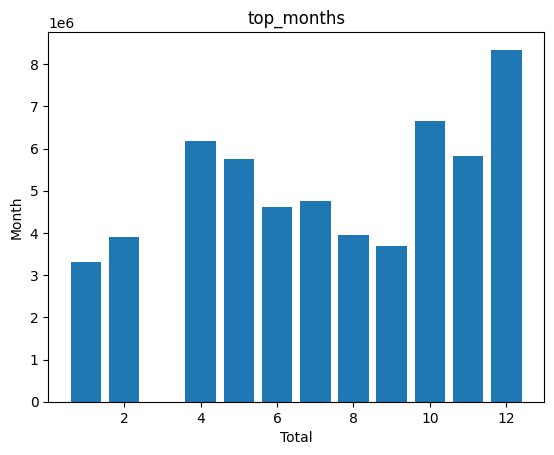

In [43]:
#découvrir les top mois
top_months=range(1, 13)
total_sales_per_month = All_Sales_Data.groupby('Month')['Total'].sum()

plt.bar(top_months, total_sales_per_month)

plt.title('top_months')
plt.xlabel('Total')
plt.ylabel('Month')

plt.show()

### Top ville

In [57]:
#Pour connaître le top par ville, il faut d'abord créer la colonne 'City'
def city(x) :
    return x.split(',') [1]

All_Sales_Data['city'] = All_Sales_Data['Adress'].apply(city)
All_Sales_Data.groupby('city')['city'].count()

city
 Atlanta           8715
 Austin            5796
 Boston           11577
 Dallas            8607
 Los Angeles      17043
 New York City    14454
 Portland          7371
 San Francisco    25953
 Seattle           8655
Name: city, dtype: int64

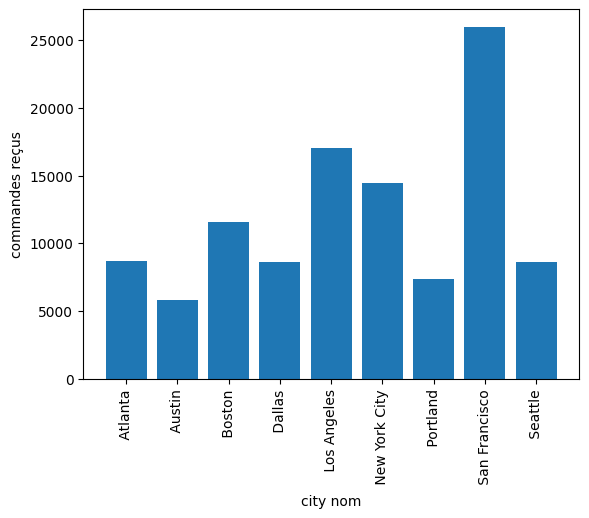

In [59]:
#Par la suite, graphique en barre
plt.bar(All_Sales_Data.groupby('city')['city'].count().index,All_Sales_Data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('commandes reçus')
plt.xlabel('city nom')
plt.show()

### Top heure pour mettre de la pub

In [62]:
# Créer une nouvelle colonne 'Hour' pour stocker les heures
All_Sales_Data['Hour'] = All_Sales_Data['Order Date'].dt.hour

In [70]:
# Calculer le nombre d'achats pour chaque heure
keys=[]
hours=[]
for key,hour in All_Sales_Data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))

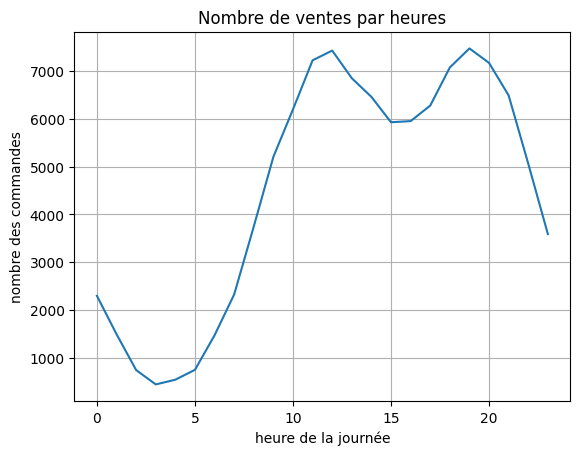

In [77]:
# Tracer le graphique
plt.grid()
plt.plot(keys,hours)
plt.xlabel('heure de la journée')
plt.ylabel('nombre des commandes')
plt.title('Nombre de ventes par heures')
plt.show()

### Top produits

In [78]:
All_Sales_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Adress,Month,Total,city,Hour,Heure
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,14,14
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.0,San Francisco,10,10
11,176567,Google Phone,1,600.0,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",4,600.0,Los Angeles,17,17
16,176572,Apple Airpods Headphones,1,150.0,2019-04-04 20:30:00,"149 Dogwood St, New York City, NY 10001",4,150.0,New York City,20,20
18,176574,Google Phone,1,600.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.0,Los Angeles,19,19
...,...,...,...,...,...,...,...,...,...,...,...
560522,259332,Apple Airpods Headphones,1,150.0,2019-09-16 19:21:00,"782 Lake St, Atlanta, GA 30301",9,150.0,Atlanta,19,19
560541,259350,Google Phone,1,600.0,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.0,San Francisco,13,13
560543,259351,Apple Airpods Headphones,1,150.0,2019-09-01 19:43:00,"981 4th St, New York City, NY 10001",9,150.0,New York City,19,19
560546,259354,iPhone,1,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.0,San Francisco,16,16


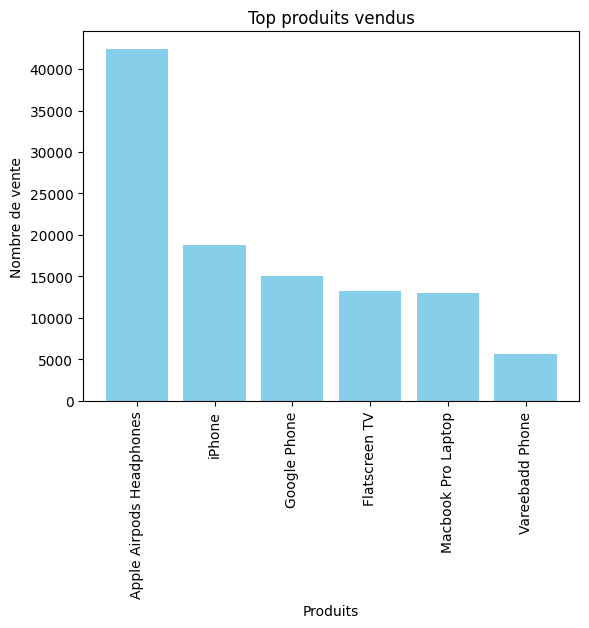

In [82]:
# Compter le nombre de ventes pour chaque produit
product_counts = All_Sales_Data['Product'].value_counts()

# Créer un graphique à barres
plt.bar(product_counts.index, product_counts.values, color='skyblue')
plt.xticks(rotation='vertical')
plt.title('Top produits vendus')
plt.ylabel('Nombre de vente')
plt.xlabel('Produits')
plt.show()